In [1]:
import torch  
from torch import nn 

import torchvision 
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt 

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
class_names = train_data.classes

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
img, labels = train_data[0]
print(img)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

## Vizualizing our data

In [6]:
img.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

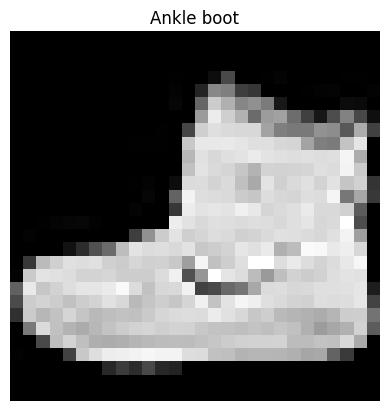

In [7]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Ankle boot")
plt.axis(False)

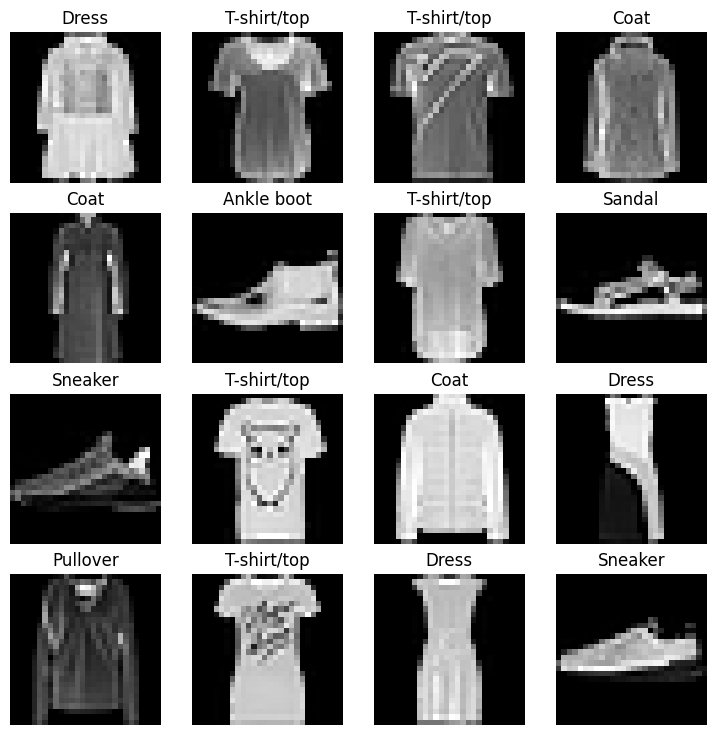

In [8]:
fig = plt.figure(figsize=(9, 9))

rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [9]:
from torch.utils.data import DataLoader 

In [10]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, 
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1de83cdd370>,
 <torch.utils.data.dataloader.DataLoader at 0x1deaf52c8b0>)

In [11]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001DE83CDD370>, <torch.utils.data.dataloader.DataLoader object at 0x000001DEAF52C8B0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

Image size: [torch.Size([1, 28, 28])]
Label: 1, label size: torch.Size([])


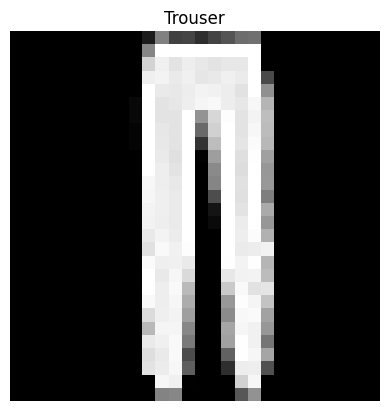

In [13]:
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {[img.shape]}")
print(f"Label: {label}, label size: {label.shape}")

In [14]:
flatten_model = nn.Flatten()

x = train_features_batch[10]
x.shape

output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
        0.1098, 0.3961, 0.7412, 0.6392, 0.5451, 0.5569, 0.7255, 0.7451, 0.4627,
        0.0941, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.3176,
        0.7098, 0.9137, 0.7647, 0.9176, 0.9608, 0.9137, 0.8941, 0.9451, 0.8039,
        0.7647, 0.9373, 0.7451, 0.4431, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.1843, 0.7176,
        0.7922, 0.7608, 0.7098, 0.6980, 0.6941, 0.7020, 0.7490, 0.7216, 0.6588,
        0.6902, 0.7176, 0.7137, 0.7647, 0.8078, 0.7294, 0.1373, 0.0000, 0.0157,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6235,
        0.7725, 0.6980, 0.7098, 0.7176, 0.7216, 0.7216, 0.6980, 0.6902, 0.7020,
        0.7098, 0.7176, 0.7216, 0.7333, 0.7294, 0.7059, 0.7922, 0.5725, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
from torch import nn

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(
        self,
        input_shape: int, 
        hidden_units: int,
        output_shape: int
    ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=output_shape),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File exists, skipping donwload...")
else: 
    pass 

File exists, skipping donwload...


In [21]:
from helper_functions import accuracy_fn

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [30]:
# create a function to time experiments 
from timeit import default_timer as timer

def print_train_time(
        start: float,
        end: float,
        device: torch.device = None
): 
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [31]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.1699999706470408e-05

In [33]:
from tqdm.auto import tqdm 

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # devide total train loss by length of train dataloader 
    train_loss /= len(train_dataloader)

    # testing 
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # calulate the test loss average pre batch 
        test_loss /= len(test_dataloader)
        test_acc /= len(train_dataloader)

    print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:07<00:15,  7.87s/it]


 Train loss: 0.4440 | Test loss: 0.4651 | Test acc: 13.9633
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:15<00:07,  7.87s/it]


 Train loss: 0.4366 | Test loss: 0.4645 | Test acc: 14.0033
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:23<00:00,  7.92s/it]


 Train loss: 0.4305 | Test loss: 0.4659 | Test acc: 14.0100
Train time on cpu: 23.757 seconds


In [37]:
torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn,
    accuracy_fn
):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, #
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [39]:
model_0_results = eval_model(
    model=model_0, 
    data_loader=test_dataloader, 
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659360349178314,
 'model_acc': 83.92571884984025}